In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
PATH_BASE = Path('../models')
PATH_MODEL = PATH_BASE/'mednli_nli-deberta-v3-base_1675241894'

df = pd.read_csv(PATH_MODEL/'pred.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence1  1422 non-null   object
 1   sentence2  1422 non-null   object
 2   label      1422 non-null   int64 
 3   pred       1422 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 44.6+ KB


In [5]:
df.head(6)

,sentence1,sentence2,label,pred
0,"In the ED, initial VS revealed T 98.9, HR 73, ...",The patient is hemodynamically stable,1,1
1,"In the ED, initial VS revealed T 98.9, HR 73, ...",The patient is hemodynamically unstable.,0,1
2,"In the ED, initial VS revealed T 98.9, HR 73, ...",The patient is in pain.,2,2
3,63 year old woman with known history of hyperc...,the patient was in a MVC,1,1
4,63 year old woman with known history of hyperc...,the patient has no medical history,0,0
5,63 year old woman with known history of hyperc...,the patient has no significant injuries,2,0


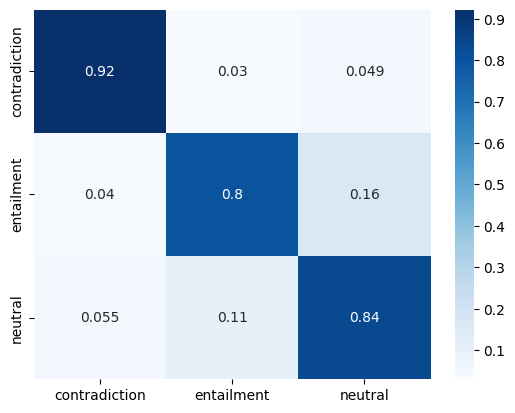

In [12]:
# constant for classes
classes = 'contradiction', 'entailment', 'neutral'

# Build confusion matrix
cf_matrix = confusion_matrix(df['label'], df['pred'])
df_cm = pd.DataFrame(
    cf_matrix / np.sum(cf_matrix, axis=1), 
    index=classes,
    columns=classes
)

sn.heatmap(df_cm, annot=True, cmap='Blues')
plt.savefig(PATH_MODEL/'confusion_matrix.png', format='png')

In [3]:
a = [
    [403, 41, 30],
    [30, 354, 90],
    [27, 56, 391]
]

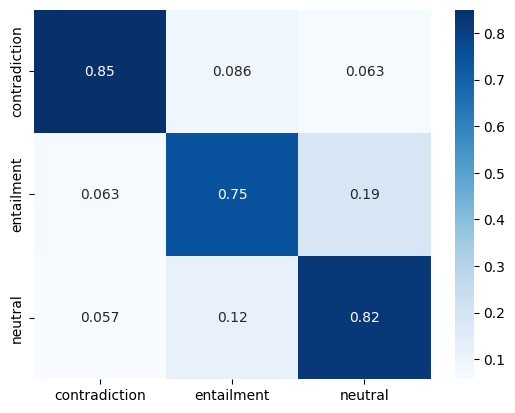

In [13]:
# constant for classes
classes = 'contradiction', 'entailment', 'neutral'

# Build confusion matrix
# cf_matrix = confusion_matrix(df['label'], df['pred'])
df_cm = pd.DataFrame(
    np.array(a, dtype=int) / 474, 
    index=classes,
    columns=classes
)

sn.heatmap(df_cm, annot=True, cmap='Blues')
plt.savefig('./confusion_matrix.png', format='png')

In [10]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, contradiction to neutral
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   contradiction  3 non-null      int32
 1   entailment     3 non-null      int32
 2   neutral        3 non-null      int32
dtypes: int32(3)
memory usage: 60.0+ bytes
